In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
googleplaystore = pd.read_csv('googleplaystore.csv')
user_reviews = pd.read_csv('googleplaystore_user_reviews.csv')

In [81]:
# Delete any review that contain neither a Translated_Review nor a Sentiment
user_reviews = user_reviews[user_reviews.Translated_Review.notnull()]
user_reviews = user_reviews[user_reviews.Sentiment.notnull()]
user_reviews.reset_index(drop=True)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
4,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
37422,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
37423,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
37424,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
37425,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [82]:
# Remove any apps that Rating is invalid (i.e., greater than 5)
googleplaystore = googleplaystore[googleplaystore.Rating <= 5]
googleplaystore = googleplaystore[googleplaystore.Rating.notnull()]
googleplaystore.reset_index(drop=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9361,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9362,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9363,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9364,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


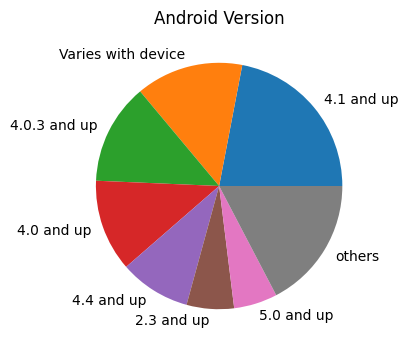

In [83]:
# Produce a pie chart with the Android Ver requirements for the different apps. 
# Group together all versions that make up less than 5% of of the total apps into a single "others" category. 

android_ver = googleplaystore['Android Ver'].value_counts()
android_ver = android_ver[android_ver > 0]

android_ver['others'] = android_ver[android_ver < len(googleplaystore['App'])  * 0.05].sum()
android_ver = android_ver[android_ver >= len(googleplaystore['App']) * 0.05]

android_ver.plot.pie(figsize=(4, 4), title='Android Version')
plt.ylabel('')
plt.show()

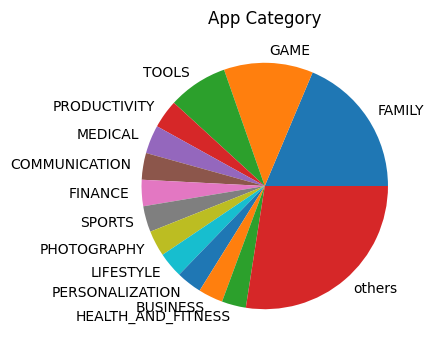

In [84]:
# Create a similar pie chart for app Category. 
# In this case, group together categories that make up less than 3% of the apps

app_category = googleplaystore['Category'].value_counts()
app_category = app_category[app_category.notnull()]

app_category['others'] = app_category[app_category < 0.03*len(googleplaystore['App'])].sum()
app_category = app_category[app_category >= 0.03*len(googleplaystore['App'])]

app_category.plot.pie(figsize=(4, 4), title='App Category')
plt.ylabel('')
plt.show()

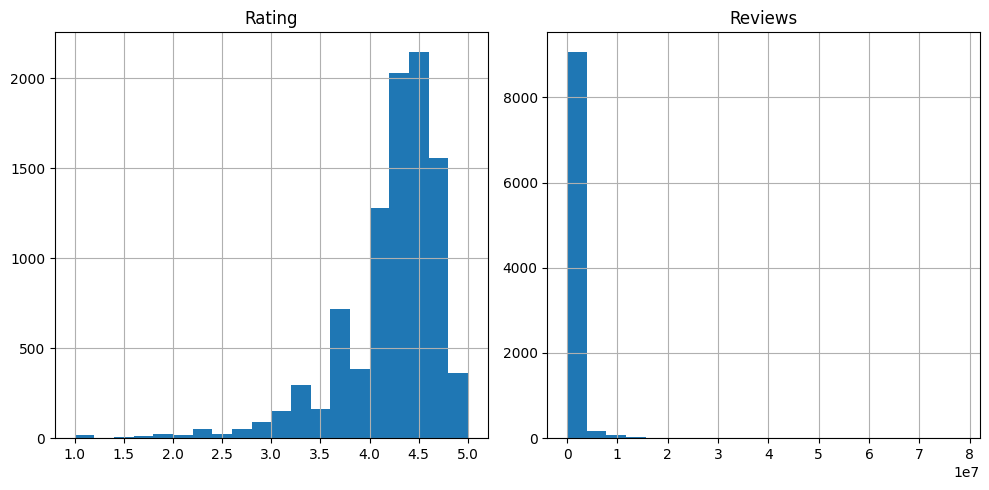

In [85]:
# Show histograms of the Rating and Review side-by-side across all apps, with 20 bins each.
# Plot the histograms side by side in subplots

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(googleplaystore['Rating'], bins=20, label="Rating")
ax[0].grid(True)
ax[0].set_title("Rating")


reviews = googleplaystore["Reviews"].replace("M", "", regex=True).astype(float)
ax[1].hist(reviews, bins=20, label="Reviews")
ax[1].grid(True)
ax[1].set_title("Reviews")

plt.tight_layout()
plt.show()

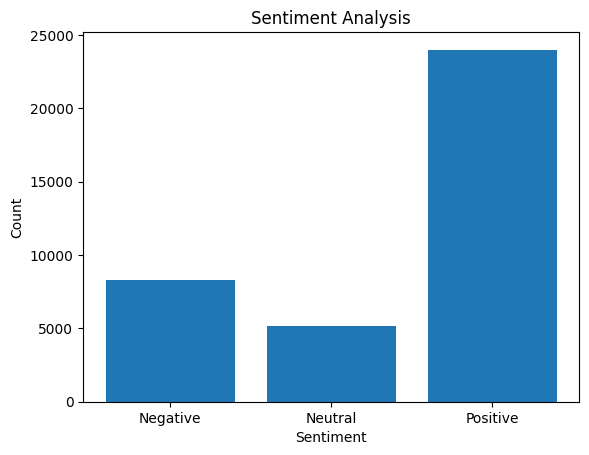

In [86]:
# Group the data by 'Sentiment' and count the occurrences
sentiment_counts = user_reviews.groupby('Sentiment').size()

# Create a bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Set the title and labels
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the plot
plt.show()

In [87]:
# Combine the two DataFrames into one, based on the App names. 
# Make sure that all apps from the apps DataFrame are kept, and no app beyond those is added. 
# In other words, the new dataset should have the same amount of unique apps as in the app dataset.

googleplaystore = googleplaystore.drop_duplicates(subset='App')
combined_dataset = pd.merge(googleplaystore, user_reviews, on='App')

In [88]:
# Get a DataFrame of Paid Game apps. Sort the DataFrame by Rating and total numbers of Reviews. 
# drop rows with duplicate app names

paid = googleplaystore[googleplaystore['Type'] == 'Paid']

paid = paid.sort_values(['Rating', 'Reviews'], ascending=[False, False])